# Load the Data

In [1]:
import pandas as pd

diamonds = pd.read_csv("diamonds.csv")

# Take a Quick Look at the Data Structure

In [2]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


*Removing column "Unnamed: 0"*

In [3]:
diamonds.drop(columns=["Unnamed: 0"], inplace=True)

In [4]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [5]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
diamonds["cut"].value_counts()

cut
Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: count, dtype: int64

In [7]:
diamonds["color"].value_counts()

color
G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [8]:
diamonds["clarity"].value_counts()

clarity
SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [9]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


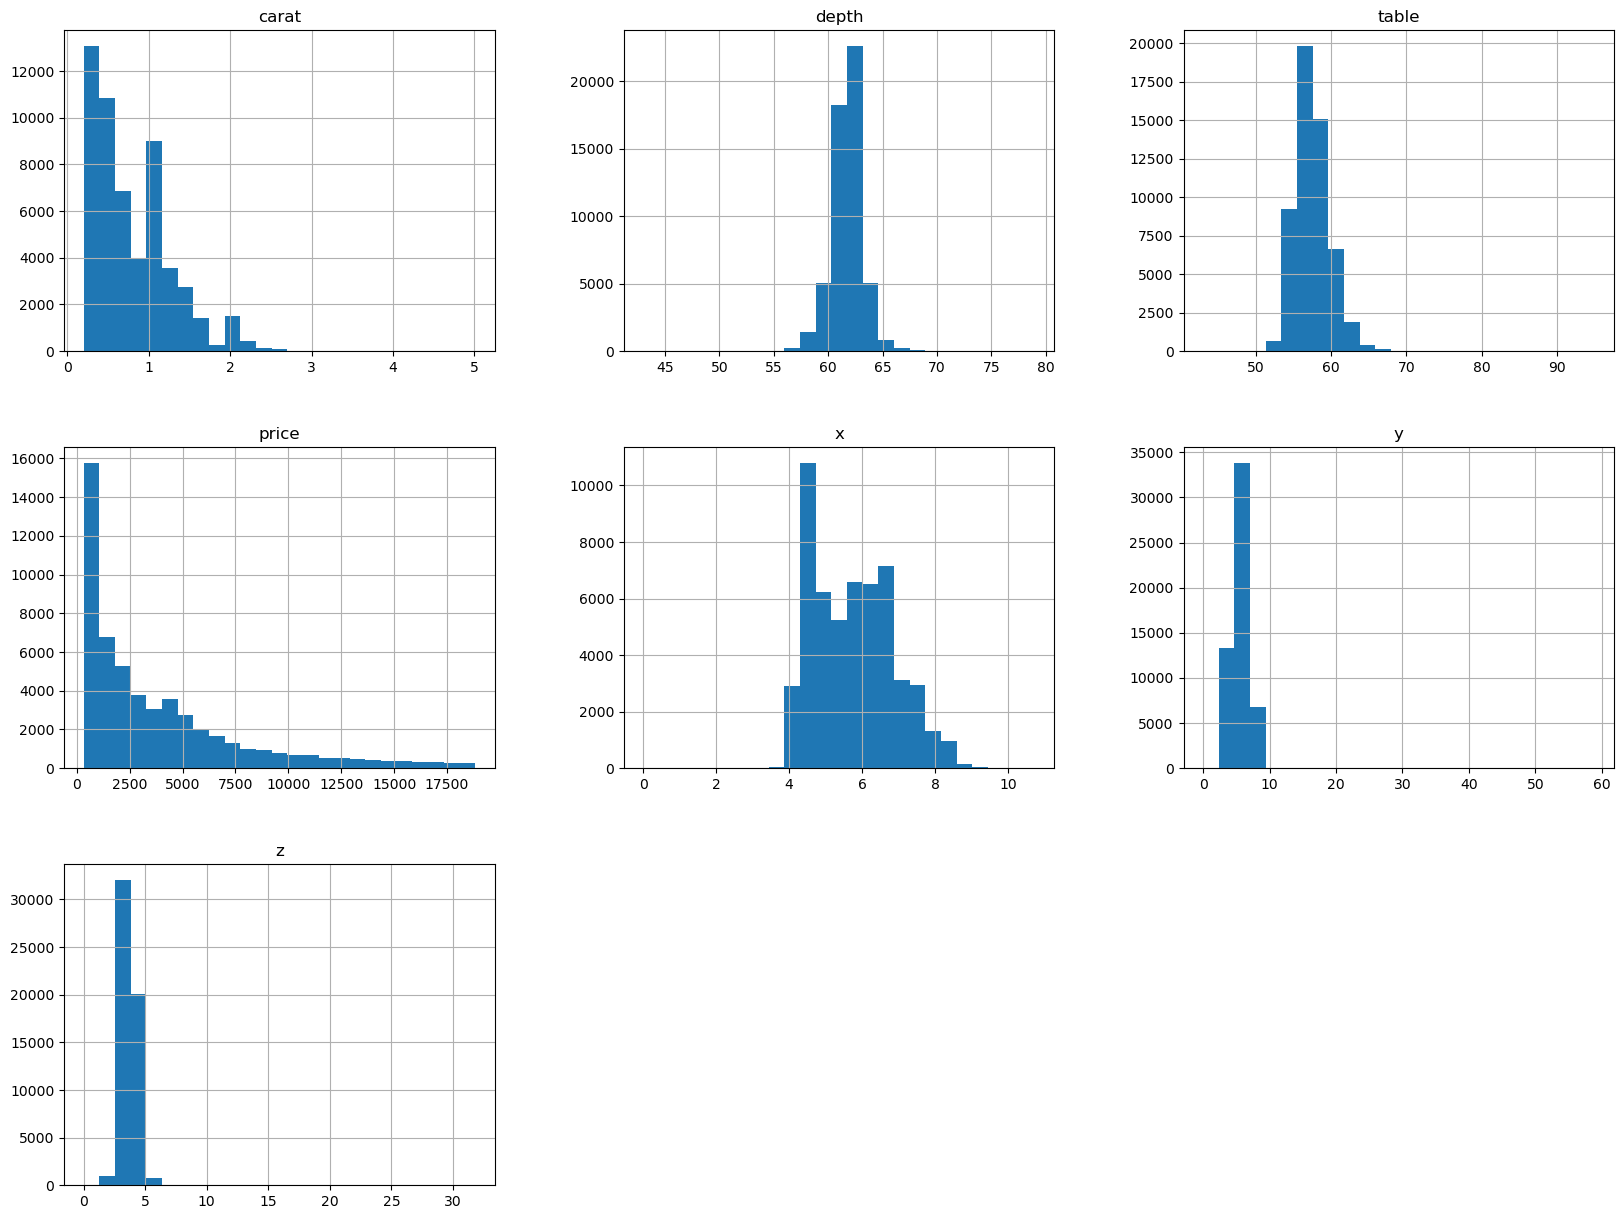

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt

diamonds.hist(bins=25, figsize=(20, 15))

plt.show()

# Create a Test Set

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(diamonds, test_size=0.2, random_state=42)

In [12]:
test_set.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1388,0.24,Ideal,G,VVS1,62.1,56.0,559,3.97,4.00,2.47
19841,1.21,Very Good,F,VS2,62.9,54.0,8403,6.78,6.82,4.28
41647,0.50,Fair,E,SI1,61.7,68.0,1238,5.09,5.03,3.12
41741,0.50,Ideal,D,SI2,62.8,56.0,1243,5.06,5.03,3.17
17244,1.55,Ideal,E,SI2,62.3,55.0,6901,7.44,7.37,4.61


<Axes: >

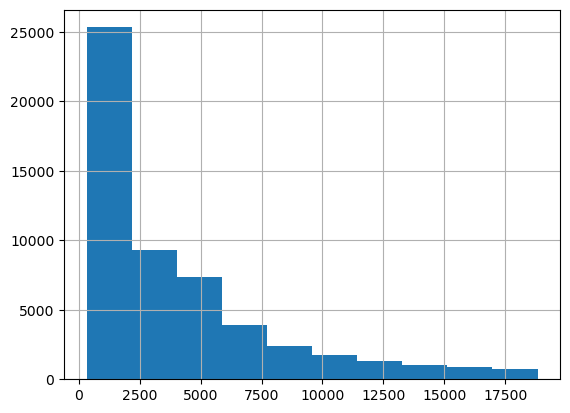

In [13]:
diamonds["price"].hist()

In [14]:
import numpy as np

diamonds["price_cat"] = pd.cut(diamonds["price"],
                              bins=[0, 3750, 7500, 11250, 15000, np.inf],
                              labels=[1, 2, 3, 4, 5])

<Axes: >

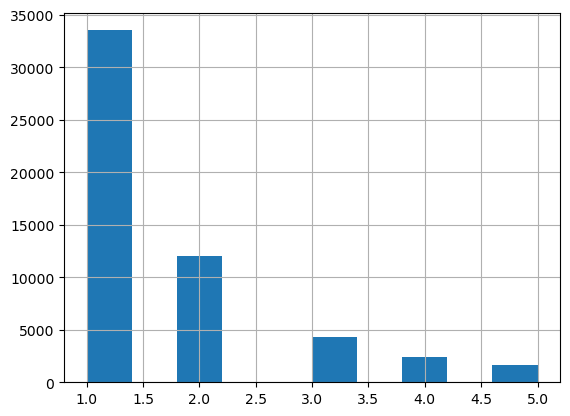

In [15]:
diamonds["price_cat"].hist()

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(diamonds, diamonds["price_cat"]):
    strat_train_set = diamonds.loc[train_index]
    strat_test_set = diamonds.loc[test_index]

In [17]:
strat_test_set["price_cat"].value_counts() / len(strat_test_set)

price_cat
1    0.621374
2    0.223190
3    0.080730
4    0.044026
5    0.030679
Name: count, dtype: float64

In [18]:
diamonds["price_cat"].value_counts() / len(diamonds)

price_cat
1    0.621397
2    0.223217
3    0.080715
4    0.043991
5    0.030681
Name: count, dtype: float64

In [19]:
def price_cat_proportions(data):
    return data["price_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(diamonds, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": price_cat_proportions(diamonds),
    "Stratified": price_cat_proportions(strat_test_set),
    "Random": price_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [20]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
price_cat,,,,,
1,0.621397,0.621374,0.627306,0.950911,-0.003707
2,0.223217,0.223190,0.222171,-0.468768,-0.012012
3,0.080715,0.080730,0.079155,-1.932896,0.019259
4,0.043991,0.044026,0.039855,-9.400746,0.080571
5,0.030681,0.030679,0.031514,2.715225,-0.003707


In [21]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("price_cat", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

In [22]:
diamonds = strat_train_set.copy()

# Visualizing Size Data

<IPython.core.display.Javascript object>


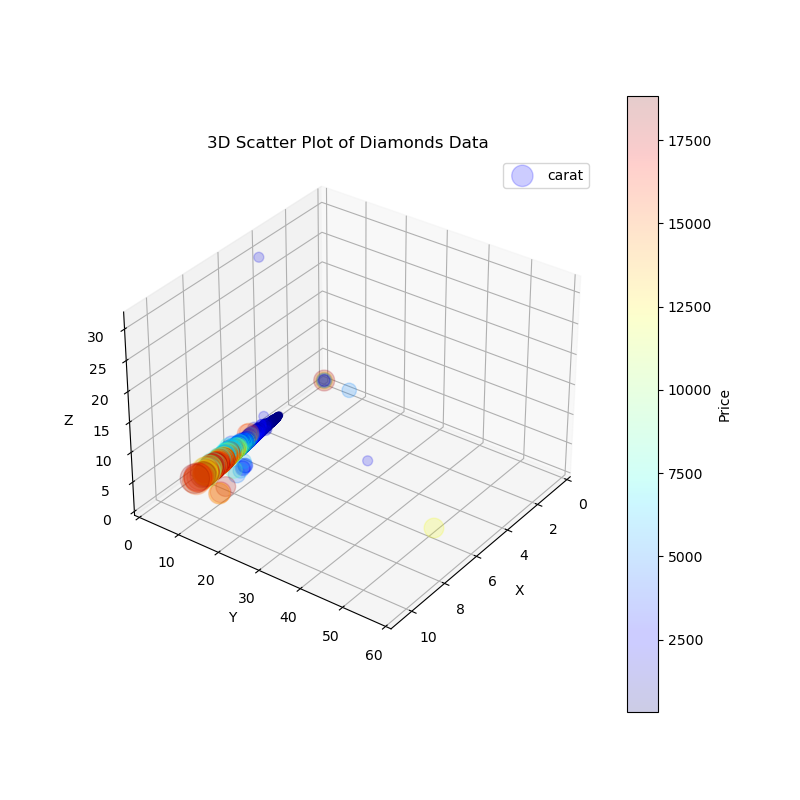

In [23]:
%matplotlib notebook

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
scatter = ax.scatter(diamonds['x'], diamonds['y'], diamonds['z'], 
                     s=diamonds["carat"] * 100, label="carat",
                     c=diamonds["price"], cmap="jet", 
                     alpha=0.2)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot of Diamonds Data')

ax.set_xlim(0, 11)
ax.set_ylim(0, 60)
ax.set_zlim(0, 32)

cbar = fig.colorbar(scatter, ax=ax, label='Price')

plt.legend()

# Show plot
plt.show()

# Looking for Correlations

In [24]:
corr_matrix = diamonds.corr(numeric_only=True)

In [25]:
corr_matrix["price"].sort_values(ascending=False)

price    1.000000
carat    0.922267
x        0.884456
y        0.860520
z        0.857663
table    0.126004
depth   -0.013056
Name: price, dtype: float64

<IPython.core.display.Javascript object>


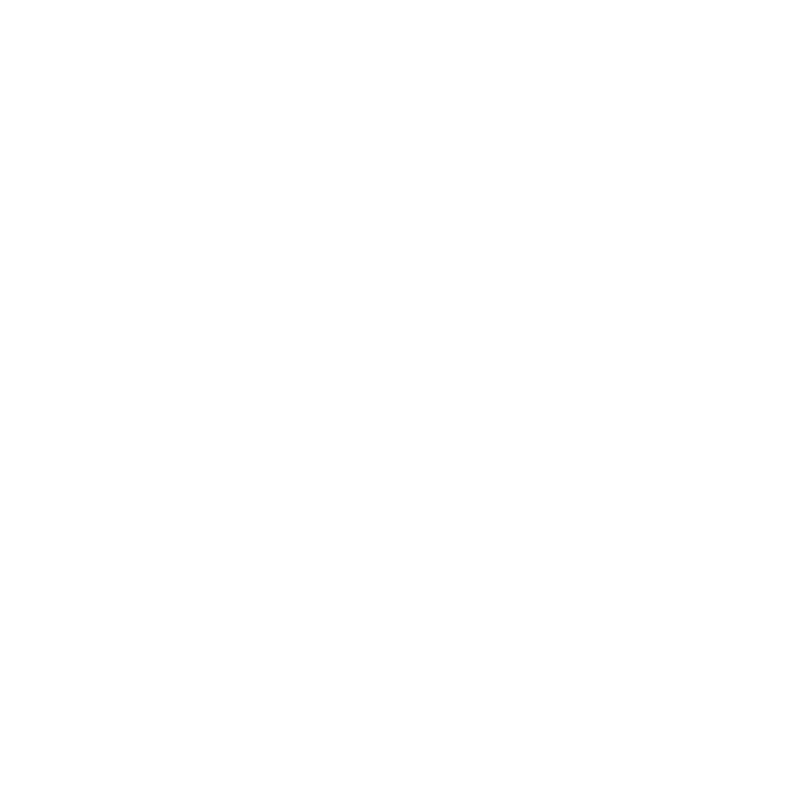

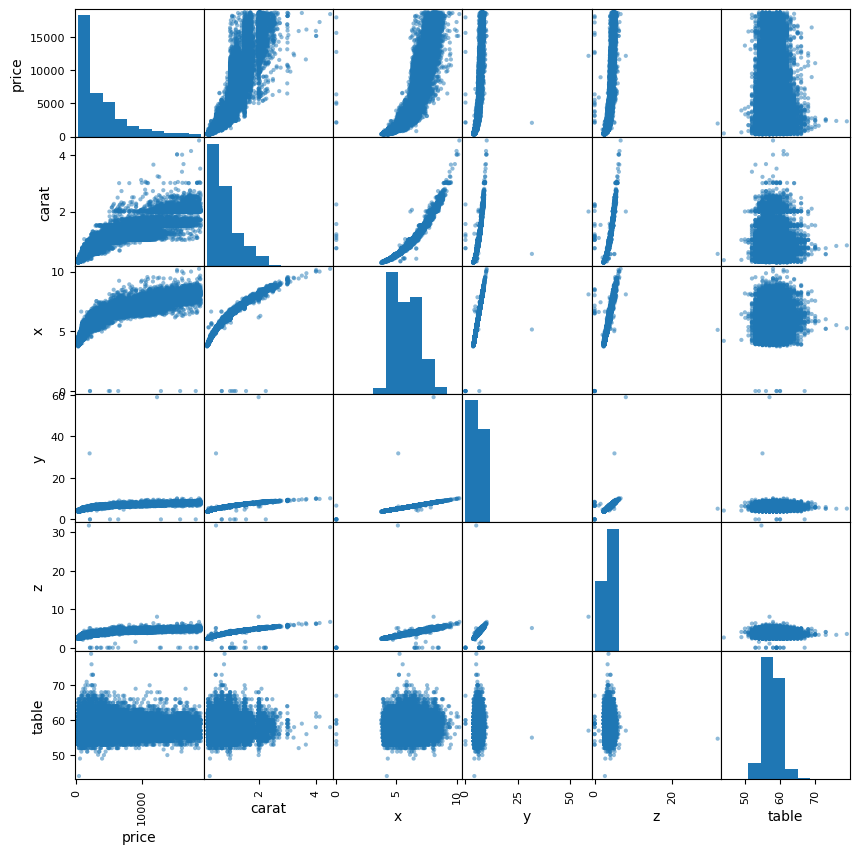

In [26]:
%matplotlib inline

from pandas.plotting import scatter_matrix

attributes = ["price", "carat", "x", "y", "z", "table"]

scatter_matrix(diamonds[attributes], figsize=(10, 10))

plt.show()

<Axes: xlabel='carat', ylabel='price'>

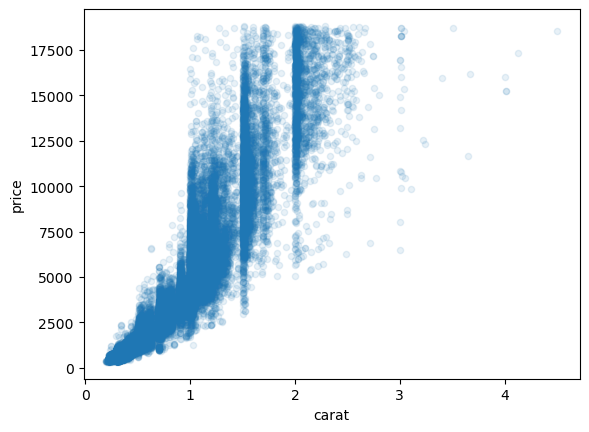

In [27]:
diamonds.plot(kind="scatter", x="carat", y="price", alpha=0.1)

# Experimenting with Attribute Combinations

In [28]:
diamonds["area"] = diamonds["x"] * diamonds["y"]
diamonds["volume"] = diamonds["x"] * diamonds["y"] * diamonds["z"]

In [29]:
corr_matrix = diamonds.corr(numeric_only="True")

In [30]:
corr_matrix["price"].sort_values(ascending=False)

price     1.000000
carat     0.922267
area      0.899405
volume    0.898287
x         0.884456
y         0.860520
z         0.857663
table     0.126004
depth    -0.013056
Name: price, dtype: float64

# Prepare the Data for Machine Learning Algorithms

In [31]:
diamonds = strat_train_set.drop("price", axis=1)
diamonds_labels = strat_train_set["price"].copy()

# Data Cleaning

In [32]:
sample_incomplete_rows = diamonds[diamonds.isnull().any(axis=1)].head()
sample_incomplete_rows

,carat,cut,color,clarity,depth,table,x,y,z


# Handling Text and Categorial Attributes

In [33]:
diamonds_cat = diamonds[["cut"]]
diamonds_cat.head(10)

,cut
53261,Premium
11081,Very Good
31565,Ideal
7942,Very Good
14097,Premium
35343,Very Good
28996,Ideal
2712,Very Good
34853,Ideal
15390,Very Good


In [34]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
diamonds_cat_encoded = ordinal_encoder.fit_transform(diamonds_cat)
diamonds_cat_encoded[:10]

array([[3.],
       [4.],
       [2.],
       [4.],
       [3.],
       [4.],
       [2.],
       [4.],
       [2.],
       [4.]])

In [35]:
ordinal_encoder.categories_

[array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object)]

In [36]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
diamonds_cat_1hot = cat_encoder.fit_transform(diamonds_cat)
diamonds_cat_1hot

<43154x5 sparse matrix of type '<class 'numpy.float64'>'
	with 43154 stored elements in Compressed Sparse Row format>

In [37]:
diamonds_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [38]:
diamonds

,carat,cut,color,clarity,depth,table,x,y,z
53261,0.74,Premium,F,SI1,61.4,59.0,5.81,5.82,3.57
11081,0.90,Very Good,E,VS2,60.4,59.0,6.26,6.30,3.79
31565,0.31,Ideal,D,VVS2,62.0,56.0,4.34,4.37,2.70
7942,1.02,Very Good,F,SI2,63.0,58.0,6.37,6.43,4.03
14097,1.23,Premium,H,SI2,62.0,59.0,6.92,6.88,4.28
...,...,...,...,...,...,...,...,...,...
13230,1.29,Premium,J,VS1,61.7,59.0,6.93,6.97,4.29
23336,1.04,Premium,E,VVS1,60.9,58.0,6.61,6.53,4.00
12684,1.01,Good,F,SI1,63.9,59.0,6.29,6.32,4.03
38727,0.40,Ideal,G,VVS1,62.0,56.0,4.73,4.76,2.94


# Custom Transformets

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin

col_names = "x", "y", "z"
x_ix, y_ix, z_ix = [diamonds.columns.get_loc(c) for c in col_names]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        area = X[:, x_ix] * X[:, y_ix]
        volume = X[:, x_ix] * X[:, y_ix] * X[:, z_ix]
        
        return np.c_[X, area, volume]
    
attr_adder = CombinedAttributesAdder()
diamonds_extra_attribs = attr_adder.transform(diamonds.values)

In [40]:
diamonds_extra_attribs = pd.DataFrame(
    diamonds_extra_attribs,
    columns=list(diamonds.columns) + ["area", "volume"],
    index=diamonds.index
)

diamonds_extra_attribs.head()

,carat,cut,color,clarity,depth,table,x,y,z,area,volume
53261,0.74,Premium,F,SI1,61.4,59.0,5.81,5.82,3.57,33.8142,120.716694
11081,0.9,Very Good,E,VS2,60.4,59.0,6.26,6.3,3.79,39.438,149.47002
31565,0.31,Ideal,D,VVS2,62.0,56.0,4.34,4.37,2.7,18.9658,51.20766
7942,1.02,Very Good,F,SI2,63.0,58.0,6.37,6.43,4.03,40.9591,165.065173
14097,1.23,Premium,H,SI2,62.0,59.0,6.92,6.88,4.28,47.6096,203.769088


# Transformation Pipelines

In [41]:
diamonds_num = diamonds.drop(["cut", "color", "clarity"], axis=1)

In [42]:
diamonds_num

,carat,depth,table,x,y,z
53261,0.74,61.4,59.0,5.81,5.82,3.57
11081,0.90,60.4,59.0,6.26,6.30,3.79
31565,0.31,62.0,56.0,4.34,4.37,2.70
7942,1.02,63.0,58.0,6.37,6.43,4.03
14097,1.23,62.0,59.0,6.92,6.88,4.28
...,...,...,...,...,...,...
13230,1.29,61.7,59.0,6.93,6.97,4.29
23336,1.04,60.9,58.0,6.61,6.53,4.00
12684,1.01,63.9,59.0,6.29,6.32,4.03
38727,0.40,62.0,56.0,4.73,4.76,2.94


In [43]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

col_names = "x", "y", "z"
x_ix, y_ix, z_ix = [diamonds_num.columns.get_loc(c) for c in col_names]

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

diamonds_num_tr = num_pipeline.fit_transform(diamonds_num)

In [44]:
diamonds_num_tr

array([[-0.12042279, -0.24488827,  0.69300845, ...,  0.0460368 ,
        -0.02026914, -0.11447375],
       [ 0.2174259 , -0.94135045,  0.69300845, ...,  0.35649396,
         0.39551506,  0.25127879],
       [-1.02839114,  0.17298904, -0.65252258, ..., -1.18168019,
        -1.11805536, -0.99865341],
       ...,
       [ 0.44969687,  1.49626719,  0.69300845, ...,  0.69517451,
         0.41878916,  0.38781609],
       [-0.83835125,  0.17298904, -0.65252258, ..., -0.84299964,
        -0.85566727, -0.80802803],
       [-0.81723571, -0.24488827, -0.20401224, ..., -0.84299964,
        -0.82748403, -0.79377198]])

In [45]:
diamonds

,carat,cut,color,clarity,depth,table,x,y,z
53261,0.74,Premium,F,SI1,61.4,59.0,5.81,5.82,3.57
11081,0.90,Very Good,E,VS2,60.4,59.0,6.26,6.30,3.79
31565,0.31,Ideal,D,VVS2,62.0,56.0,4.34,4.37,2.70
7942,1.02,Very Good,F,SI2,63.0,58.0,6.37,6.43,4.03
14097,1.23,Premium,H,SI2,62.0,59.0,6.92,6.88,4.28
...,...,...,...,...,...,...,...,...,...
13230,1.29,Premium,J,VS1,61.7,59.0,6.93,6.97,4.29
23336,1.04,Premium,E,VVS1,60.9,58.0,6.61,6.53,4.00
12684,1.01,Good,F,SI1,63.9,59.0,6.29,6.32,4.03
38727,0.40,Ideal,G,VVS1,62.0,56.0,4.73,4.76,2.94


In [46]:
from sklearn.compose import ColumnTransformer

num_attribs = ["carat", "depth", "table", "x", "y", "z"]
cat_attribs = ["cut", "color", "clarity"]

col_names = "x", "y", "z"
x_ix, y_ix, z_ix = [diamonds_num.columns.get_loc(c) for c in col_names]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

diamonds_prepared = full_pipeline.fit_transform(diamonds)

In [47]:
diamonds_prepared

array([[-0.12042279, -0.24488827,  0.69300845, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.2174259 , -0.94135045,  0.69300845, ...,  1.        ,
         0.        ,  0.        ],
       [-1.02839114,  0.17298904, -0.65252258, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.44969687,  1.49626719,  0.69300845, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83835125,  0.17298904, -0.65252258, ...,  0.        ,
         1.        ,  0.        ],
       [-0.81723571, -0.24488827, -0.20401224, ...,  0.        ,
         1.        ,  0.        ]])

In [48]:
diamonds_prepared.shape

(43154, 28)

In [49]:
diamonds_prepared

array([[-0.12042279, -0.24488827,  0.69300845, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.2174259 , -0.94135045,  0.69300845, ...,  1.        ,
         0.        ,  0.        ],
       [-1.02839114,  0.17298904, -0.65252258, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.44969687,  1.49626719,  0.69300845, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83835125,  0.17298904, -0.65252258, ...,  0.        ,
         1.        ,  0.        ],
       [-0.81723571, -0.24488827, -0.20401224, ...,  0.        ,
         1.        ,  0.        ]])

# Select and Train a Model

# Training and Evaluating on the Training Set

In [50]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(diamonds_prepared, diamonds_labels)

LinearRegression()

In [51]:
some_data = diamonds.iloc[:5]
some_labels = diamonds_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [3146.15145071 5289.04671909 1611.22484742 4689.2468046  5992.42117562]


In [52]:
print("Labels:", list(some_labels))

Labels: [2648, 4925, 766, 4319, 5717]


In [53]:
some_data_prepared

array([[-0.12042279, -0.24488827,  0.69300845,  0.07261261,  0.07613033,
         0.0460368 , -0.02026914, -0.11447375,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.2174259 , -0.94135045,  0.69300845,  0.47373629,  0.49374576,
         0.35649396,  0.39551506,  0.25127879,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ],
       [-1.02839114,  0.17298904, -0.65252258, -1.23772474, -1.18541626,
        -1.18168019, -1.11805536, -0.99865341,  0.        ,  0.        ,
         1.        ,  0.    

In [54]:
from sklearn.metrics import mean_squared_error

diamonds_predictions = lin_reg.predict(diamonds_prepared)
lin_mse = mean_squared_error(diamonds_labels, diamonds_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1108.1868914976105

In [55]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(diamonds_prepared, diamonds_labels)

DecisionTreeRegressor(random_state=42)

In [56]:
diamonds_predictions = tree_reg.predict(diamonds_prepared)
tree_mse = mean_squared_error(diamonds_labels, diamonds_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

9.346880568437307

# Better Evaluation Using Croos-Validation

In [57]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, diamonds_prepared, diamonds_labels, scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [58]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [775.80988058 744.46187861 737.51331336 740.40284885 748.06405022
 745.05130995 724.33974746 738.98868351 786.20784858 795.19320604]
Mean: 753.6032767178428
Standard deviation: 22.307793712977503


In [59]:
lin_scores = cross_val_score(lin_reg, diamonds_prepared, diamonds_labels, scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [1153.51338243 1096.85729267 1107.52680297 1791.84758825 1089.16590779
 1142.98278144 1113.96424517 1108.30608901 1098.68355499 1162.90840012]
Mean: 1186.5756044842205
Standard deviation: 203.1792391142559


In [60]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(diamonds_prepared, diamonds_labels)

RandomForestRegressor(random_state=42)

In [61]:
diamonds_predictions = forest_reg.predict(diamonds_prepared)
forest_mse = mean_squared_error(diamonds_labels, diamonds_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

205.73481206373768

In [62]:
forest_scores = cross_val_score(forest_reg, diamonds_prepared, diamonds_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [554.45415816 540.77642722 549.18925047 575.53656007 566.52254454
 543.14160918 572.25988438 544.58581997 543.74025502 576.50352252]
Mean: 556.6710031536136
Standard deviation: 13.780903883212263


# Fine-Tune Your Model

# Grid Search

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [125, 150, 175, 200], 'max_features': [15, 20, 25, 30]},
    {'bootstrap': [False], 'n_estimators': [30, 128], 'max_features': [8, 14]}
]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(diamonds_prepared, diamonds_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [15, 20, 25, 30],
                          'n_estimators': [125, 150, 175, 200]},
                         {'bootstrap': [False], 'max_features': [8, 14],
                          'n_estimators': [30, 128]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [64]:
grid_search.best_params_

{'max_features': 20, 'n_estimators': 200}

In [65]:
grid_search.best_estimator_

RandomForestRegressor(max_features=20, n_estimators=200, random_state=42)

In [66]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

562.0562733633434 {'max_features': 15, 'n_estimators': 125}
561.669372468267 {'max_features': 15, 'n_estimators': 150}
561.2429973217284 {'max_features': 15, 'n_estimators': 175}
560.5926728034949 {'max_features': 15, 'n_estimators': 200}
560.4332528339613 {'max_features': 20, 'n_estimators': 125}
559.831320973808 {'max_features': 20, 'n_estimators': 150}
559.7753279696351 {'max_features': 20, 'n_estimators': 175}
559.1338855175662 {'max_features': 20, 'n_estimators': 200}
561.4585156433441 {'max_features': 25, 'n_estimators': 125}
561.2387410322436 {'max_features': 25, 'n_estimators': 150}
560.9093608250357 {'max_features': 25, 'n_estimators': 175}
560.6665861217721 {'max_features': 25, 'n_estimators': 200}
562.6567228927576 {'max_features': 30, 'n_estimators': 125}
562.5351975634724 {'max_features': 30, 'n_estimators': 150}
561.8879126261792 {'max_features': 30, 'n_estimators': 175}
562.0236709407167 {'max_features': 30, 'n_estimators': 200}
578.0579583568684 {'bootstrap': False, 'ma

# Randomized Search

In [67]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                               n_iter=10, cv=5, scoring="neg_mean_squared_error", random_state=42)

rnd_search.fit(diamonds_prepared, diamonds_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fc7dc054e50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fc7dc0ee8d0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [68]:
cvres = rnd_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

576.2098427691427 {'max_features': 7, 'n_estimators': 180}
622.2856256044155 {'max_features': 5, 'n_estimators': 15}
637.3462180113727 {'max_features': 3, 'n_estimators': 72}
616.7873362275207 {'max_features': 5, 'n_estimators': 21}
577.043858809246 {'max_features': 7, 'n_estimators': 122}
637.5413436363765 {'max_features': 3, 'n_estimators': 75}
636.6187572904583 {'max_features': 3, 'n_estimators': 88}
594.8188569836129 {'max_features': 5, 'n_estimators': 100}
637.4766260282975 {'max_features': 3, 'n_estimators': 150}
799.8739159038889 {'max_features': 5, 'n_estimators': 2}


# Analyze the Best Models and Their Errors

In [69]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([2.82665661e-01, 2.57598347e-03, 1.86632308e-03, 7.56560894e-03,
       1.94581653e-01, 3.56884523e-03, 7.36516879e-02, 3.37893468e-01,
       1.96600363e-04, 1.85252542e-04, 8.57334730e-04, 3.54374682e-04,
       2.46061536e-04, 2.91735186e-03, 1.38810815e-03, 1.31722369e-03,
       2.42781006e-03, 5.91349522e-03, 7.95452736e-03, 1.06779215e-02,
       1.32268800e-02, 3.29014152e-03, 1.14559561e-02, 1.80986485e-02,
       3.02417300e-03, 3.91791640e-03, 3.21328233e-03, 4.96770955e-03])

In [70]:
extra_attribs = ["area", "volume"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.33789346752435734, 'volume'),
 (0.28266566136507226, 'carat'),
 (0.19458165329396407, 'y'),
 (0.07365168794752235, 'area'),
 (0.007565608941553917, 'x'),
 (0.003568845227779959, 'z'),
 (0.002575983469284627, 'depth'),
 (0.0018663230843784617, 'table'),
 (0.0008573347302044948, 'Ideal'),
 (0.000354374682049727, 'Premium'),
 (0.00024606153558176633, 'Very Good'),
 (0.0001966003630644777, 'Fair'),
 (0.00018525254159164762, 'Good')]

# Evaluate Your System on the Test Set

In [71]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("price", axis=1)
y_test = strat_test_set["price"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [72]:
final_rmse

538.5368307184425

In [73]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)
                        )
       )

array([515.49536076, 560.63211566])

# Exercises

### 1. Try a Support Vector Machine regressor (`sklearn.svm.SVR`) with various hyperparameters, such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for `C` and `gamma` hyperparameters). Donʼt worry about what these hyperparameters mean for now. How does the best SVR predictor perform?

In [74]:
from sklearn.svm import SVR

param_grid = [
    {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 1500.]},
    {'kernel': ['rbf'], 'C': [1., 3., 10., 30., 100., 300., 1000.], 'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}
]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(diamonds_prepared, diamonds_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ..............................C=10.0, kernel=linear; total time=  34.8s
[CV] END ..............................C=10.0, kernel=linear; total time=  35.0s
[CV] END ..............................C=10.0, kernel=linear; total time=  35.2s
[CV] END ..............................C=10.0, kernel=linear; total time=  34.6s
[CV] END ..............................C=10.0, kernel=linear; total time=  34.1s
[CV] END ..............................C=30.0, kernel=linear; total time=  36.3s
[CV] END ..............................C=30.0, kernel=linear; total time=  35.4s
[CV] END ..............................C=30.0, kernel=linear; total time=  37.1s
[CV] END ..............................C=30.0, kernel=linear; total time=  36.0s
[CV] END ..............................C=30.0, kernel=linear; total time=  36.1s
[CV] END .............................C=100.0, kernel=linear; total time=  40.6s
[CV] END .............................C=100.0, 

[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=  41.9s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=  41.9s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=  41.9s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=  41.9s
[CV] END ......................C=10.0, gamma=0.3, kernel=rbf; total time=  41.4s
[CV] END ......................C=10.0, gamma=0.3, kernel=rbf; total time=  41.5s
[CV] END ......................C=10.0, gamma=0.3, kernel=rbf; total time=  41.5s
[CV] END ......................C=10.0, gamma=0.3, kernel=rbf; total time=  41.4s
[CV] END ......................C=10.0, gamma=0.3, kernel=rbf; total time=  41.5s
[CV] END ......................C=10.0, gamma=1.0, kernel=rbf; total time=  40.6s
[CV] END ......................C=10.0, gamma=1.0, kernel=rbf; total time=  40.8s
[CV] END ......................C=10.0, gamma=1.0, kernel=rbf; total time=  40.7s
[CV] END ...................

[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time= 1.9min
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time= 1.8min
[CV] END .....................C=300.0, gamma=3.0, kernel=rbf; total time= 1.5min
[CV] END .....................C=300.0, gamma=3.0, kernel=rbf; total time= 1.5min
[CV] END .....................C=300.0, gamma=3.0, kernel=rbf; total time= 1.4min
[CV] END .....................C=300.0, gamma=3.0, kernel=rbf; total time= 1.5min
[CV] END .....................C=300.0, gamma=3.0, kernel=rbf; total time= 1.4min
[CV] END ...................C=1000.0, gamma=0.01, kernel=rbf; total time=  44.5s
[CV] END ...................C=1000.0, gamma=0.01, kernel=rbf; total time=  44.7s
[CV] END ...................C=1000.0, gamma=0.01, kernel=rbf; total time=  44.7s
[CV] END ...................C=1000.0, gamma=0.01, kernel=rbf; total time=  44.4s
[CV] END ...................C=1000.0, gamma=0.01, kernel=rbf; total time=  44.8s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 1500.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [75]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

645.0663569809725

In [76]:
grid_search.best_params_

{'C': 1000.0, 'gamma': 0.1, 'kernel': 'rbf'}

### 2. Try replacing `GridSearchCV` with `RandomizedSearchCV`. 

In [77]:
print("test")

test


In [78]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

param_distribs = {
    'kernel': ['linear', 'rbf'],
    'C': reciprocal(20, 2000),
    'gamma': expon(scale=1.0),
}

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs, n_iter=50, cv=5, 
                                scoring='neg_mean_squared_error', verbose=2, random_state=42)

rnd_search.fit(diamonds_prepared, diamonds_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=112.23032830669005, gamma=3.010121430917521, kernel=linear; total time=  42.3s
[CV] END C=112.23032830669005, gamma=3.010121430917521, kernel=linear; total time=  42.5s
[CV] END C=112.23032830669005, gamma=3.010121430917521, kernel=linear; total time=  42.5s
[CV] END C=112.23032830669005, gamma=3.010121430917521, kernel=linear; total time=  41.2s
[CV] END C=112.23032830669005, gamma=3.010121430917521, kernel=linear; total time=  42.6s
[CV] END C=725.1235269152456, gamma=0.9084469696321253, kernel=rbf; total time= 4.6min
[CV] END C=725.1235269152456, gamma=0.9084469696321253, kernel=rbf; total time= 4.6min
[CV] END C=725.1235269152456, gamma=0.9084469696321253, kernel=rbf; total time= 4.8min
[CV] END C=725.1235269152456, gamma=0.9084469696321253, kernel=rbf; total time= 4.3min
[CV] END C=725.1235269152456, gamma=0.9084469696321253, kernel=rbf; total time= 4.6min
[CV] END C=41.022208376867944, gamma=0.05983876860868

[CV] END C=422.7411888129143, gamma=0.37354658165762367, kernel=rbf; total time= 2.2min
[CV] END C=422.7411888129143, gamma=0.37354658165762367, kernel=rbf; total time= 2.5min
[CV] END C=422.7411888129143, gamma=0.37354658165762367, kernel=rbf; total time= 2.4min
[CV] END C=52.109069891607994, gamma=0.838636245624803, kernel=linear; total time=  39.4s
[CV] END C=52.109069891607994, gamma=0.838636245624803, kernel=linear; total time=  37.0s
[CV] END C=52.109069891607994, gamma=0.838636245624803, kernel=linear; total time=  38.1s
[CV] END C=52.109069891607994, gamma=0.838636245624803, kernel=linear; total time=  37.3s
[CV] END C=52.109069891607994, gamma=0.838636245624803, kernel=linear; total time=  37.7s
[CV] END C=1738.598302227909, gamma=1.4922453771381408, kernel=rbf; total time= 8.9min
[CV] END C=1738.598302227909, gamma=1.4922453771381408, kernel=rbf; total time= 8.5min
[CV] END C=1738.598302227909, gamma=1.4922453771381408, kernel=rbf; total time= 9.2min
[CV] END C=1738.598302227

[CV] END C=34.69113328472186, gamma=1.2491263443165994, kernel=linear; total time=  36.8s
[CV] END C=555.2506018887666, gamma=0.2691677514619319, kernel=rbf; total time= 2.9min
[CV] END C=555.2506018887666, gamma=0.2691677514619319, kernel=rbf; total time= 2.7min
[CV] END C=555.2506018887666, gamma=0.2691677514619319, kernel=rbf; total time= 3.1min
[CV] END C=555.2506018887666, gamma=0.2691677514619319, kernel=rbf; total time= 3.0min
[CV] END C=555.2506018887666, gamma=0.2691677514619319, kernel=rbf; total time= 3.1min
[CV] END C=194.36639889634802, gamma=0.739678838777267, kernel=linear; total time=  48.8s
[CV] END C=194.36639889634802, gamma=0.739678838777267, kernel=linear; total time=  47.5s
[CV] END C=194.36639889634802, gamma=0.739678838777267, kernel=linear; total time=  49.0s
[CV] END C=194.36639889634802, gamma=0.739678838777267, kernel=linear; total time=  48.9s
[CV] END C=194.36639889634802, gamma=0.739678838777267, kernel=linear; total time=  47.7s
[CV] END C=33.32818300247

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fc7dff39210>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fc7dc1bf5d0>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [79]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

637.8023052841028

In [80]:
rnd_search.best_params_

{'C': 1772.315490506615, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

### 3. Try adding a transformer in the preparation pipeline to select only the most important attributes.

In [81]:
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
        
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    
    def transform(self, X):
        return X[:, self.feature_indices_]

In [82]:
k = 5

In [83]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  4,  6,  7, 23])

In [85]:
np.array(attributes)[top_k_feature_indices[0:4]]

array(['carat', 'y', 'area', 'volume'], dtype='<U9')

In [87]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.33789346752435734, 'volume'),
 (0.28266566136507226, 'carat'),
 (0.19458165329396407, 'y'),
 (0.07365168794752235, 'area'),
 (0.007565608941553917, 'x')]

In [88]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [89]:
diamonds_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(diamonds)

In [90]:
diamonds_prepared_top_k_features[0:3]

array([[-0.12042279,  0.07613033, -0.02026914, -0.11447375,  0.        ],
       [ 0.2174259 ,  0.49374576,  0.39551506,  0.25127879,  0.        ],
       [-1.02839114, -1.18541626, -1.11805536, -0.99865341,  0.        ]])

In [91]:
diamonds_prepared[0:3, top_k_feature_indices]

array([[-0.12042279,  0.07613033, -0.02026914, -0.11447375,  0.        ],
       [ 0.2174259 ,  0.49374576,  0.39551506,  0.25127879,  0.        ],
       [-1.02839114, -1.18541626, -1.11805536, -0.99865341,  0.        ]])

### 4. Try creating a single pipeline that does the full data preparation plus the final prediction

In [92]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [93]:
prepare_select_and_predict_pipeline.fit(diamonds, diamonds_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('feature_selection',
                 TopFeatureSelector(feature_i...
       1.96600363e-04, 1.85252542e-04, 8.57334730e-04, 3.54374682e-04,
       2.46061536e-04, 2.91735186e-03, 1.38810815e-03, 1.31722369e-03,
       2.42781006e-03, 5.91349522e-03, 7.95452736e-03, 1.06779215e-02,
       1.32268800e-02, 3.29014152e-03, 1.14559561e-02, 1.80986485e-02,
       3.02417300e-03, 3.91791640e-03, 3.21328233e-03, 4.96770955e-03]),
                                    k=5)),
                ('svm_reg',
                 SVR(C=1772.315490506615, gamma=0.26497040005002437))])

In [94]:
some_data = diamonds.iloc[:4]
some_labels = diamonds_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [2818.74767407 4602.63941209  655.00775354 4321.59414787]
Labels:		 [2648, 4925, 766, 4319]


### 5. Automatically explore some preparations options using `GridSearchCV`.

In [95]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs)
])

prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5, 
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(diamonds, diamonds_labels)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  43.2s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  43.6s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  43.1s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  43.4s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  43.0s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  43.3s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  43.6s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  42.8s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  43.3s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total t

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  43.6s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  43.4s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  43.9s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  44.0s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  43.7s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  43.7s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  44.1s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  44.4s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  43.8s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  44.3s
[CV] END feat

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  45.4s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  46.0s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  46.0s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  45.9s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  45.7s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  45.6s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  46.2s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  46.2s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  46.0s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  45.6s
[CV] END feat

[CV] END feature_selection__k=17, preparation__num__imputer__strategy=most_frequent; total time=  48.7s
[CV] END feature_selection__k=17, preparation__num__imputer__strategy=most_frequent; total time=  48.5s
[CV] END feature_selection__k=17, preparation__num__imputer__strategy=most_frequent; total time=  48.3s
[CV] END feature_selection__k=18, preparation__num__imputer__strategy=mean; total time=  49.6s
[CV] END feature_selection__k=18, preparation__num__imputer__strategy=mean; total time=  49.6s
[CV] END feature_selection__k=18, preparation__num__imputer__strategy=mean; total time=  49.6s
[CV] END feature_selection__k=18, preparation__num__imputer__strategy=mean; total time=  49.3s
[CV] END feature_selection__k=18, preparation__num__imputer__strategy=mean; total time=  49.6s
[CV] END feature_selection__k=18, preparation__num__imputer__strategy=median; total time=  49.6s
[CV] END feature_selection__k=18, preparation__num__imputer__strategy=median; total time=  49.6s
[CV] END feature_se

[CV] END feature_selection__k=23, preparation__num__imputer__strategy=median; total time= 4.8min
[CV] END feature_selection__k=23, preparation__num__imputer__strategy=median; total time= 4.5min
[CV] END feature_selection__k=23, preparation__num__imputer__strategy=median; total time= 5.4min
[CV] END feature_selection__k=23, preparation__num__imputer__strategy=median; total time= 4.9min
[CV] END feature_selection__k=23, preparation__num__imputer__strategy=most_frequent; total time= 4.8min
[CV] END feature_selection__k=23, preparation__num__imputer__strategy=most_frequent; total time= 4.8min
[CV] END feature_selection__k=23, preparation__num__imputer__strategy=most_frequent; total time= 4.5min
[CV] END feature_selection__k=23, preparation__num__imputer__strategy=most_frequent; total time= 5.4min
[CV] END feature_selection__k=23, preparation__num__imputer__strategy=most_frequent; total time= 4.9min
[CV] END feature_selection__k=24, preparation__num__imputer__strategy=mean; total time= 7.2m

[CV] END feature_selection__k=28, preparation__num__imputer__strategy=most_frequent; total time= 9.5min


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('attribs_adder',
                                                                                          CombinedAttributesAdder()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['carat',
                                                                          'depth',
                                                                          'table',
                                                                          'x',
                                                                          'y',
                                                                          'z']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['cut',
                                                                          'color',
                                                                          'clarity'])])...
       3.02417300e-03, 3.91791640e-03, 3.21328233e-03, 4.96770955e-03]),
                                                           k=5)),
                                       ('svm_reg',
                                        SVR(C=1772.315490506615,
                                            gamma=0.26497040005002437))]),
             param_grid=[{'feature_selection__k': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28],
                          'preparation__num__imputer__strategy': ['mean',
                                                                  'median',
                                                                  'most_frequent']}],
             scoring='neg_mean_squared_error', verbose=2)

In [96]:
grid_search_prep.best_params_

{'feature_selection__k': 20, 'preparation__num__imputer__strategy': 'mean'}